In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Import our input dataset
file_path = Path('./Resources/vgsales-12-4-2019-short.csv')
vgsales_df = pd.read_csv(file_path)
vgsales_df.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


In [3]:
vgsales_df.columns.tolist()

['Rank',
 'Name',
 'Genre',
 'ESRB_Rating',
 'Platform',
 'Publisher',
 'Developer',
 'Critic_Score',
 'User_Score',
 'Total_Shipped',
 'Global_Sales',
 'NA_Sales',
 'PAL_Sales',
 'JP_Sales',
 'Other_Sales',
 'Year']

In [4]:
vgsales_df.dtypes

Rank               int64
Name              object
Genre             object
ESRB_Rating       object
Platform          object
Publisher         object
Developer         object
Critic_Score     float64
User_Score       float64
Total_Shipped    float64
Global_Sales     float64
NA_Sales         float64
PAL_Sales        float64
JP_Sales         float64
Other_Sales      float64
Year             float64
dtype: object

In [5]:
vgsales_df.count()

Rank             55792
Name             55792
Genre            55792
ESRB_Rating      23623
Platform         55792
Publisher        55792
Developer        55775
Critic_Score      6536
User_Score         335
Total_Shipped     1827
Global_Sales     19415
NA_Sales         12964
PAL_Sales        13189
JP_Sales          7043
Other_Sales      15522
Year             54813
dtype: int64

In [6]:
# Select Critic_Score & Global_Sales
critic_vs_sales = vgsales_df[['Critic_Score', 'Global_Sales']]
critic_vs_sales.head(5)

,Critic_Score,Global_Sales
0,7.7,NaN
1,10.0,NaN
2,8.2,NaN
3,NaN,NaN
4,8.0,NaN


In [7]:
critic_vs_sales.count()

Critic_Score     6536
Global_Sales    19415
dtype: int64

In [8]:
# Find null value
for column in critic_vs_sales.columns:
    print(f'Column {column} has {critic_vs_sales[column].isnull().sum()} null values')

Column Critic_Score has 49256 null values
Column Global_Sales has 36377 null values


In [9]:
critic_vs_sales = critic_vs_sales.dropna()

In [10]:
# Find null value
for column in critic_vs_sales.columns:
    print(f'Column {column} has {critic_vs_sales[column].isnull().sum()} null values')

Column Critic_Score has 0 null values
Column Global_Sales has 0 null values


In [11]:
critic_vs_sales.head()

,Critic_Score,Global_Sales
19,9.4,20.32
20,9.7,19.39
30,9.6,16.15
40,8.7,14.82
41,8.8,14.74


In [12]:
critic_vs_sales.shape

(4275, 2)

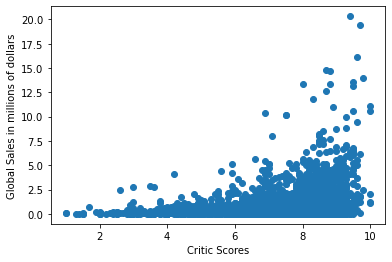

In [13]:
# Visually inspect the relationship between Genre & Global_Sales
plt.scatter(critic_vs_sales.Critic_Score, critic_vs_sales.Global_Sales)
plt.ylabel('Global Sales in millions of dollars')
plt.xlabel('Critic Scores')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

# Preparing for Scikit-learn

In [14]:
# Format the data to meet the requirements of the Scikit-learn library
X = critic_vs_sales.Critic_Score.values.reshape(-1, 1)

In [15]:
#  Examine the first five entries in X
X[:5]

array([[9.4],
       [9.7],
       [9.6],
       [8.7],
       [8.8]])

In [16]:
X.shape

(4275, 1)

(4275,)


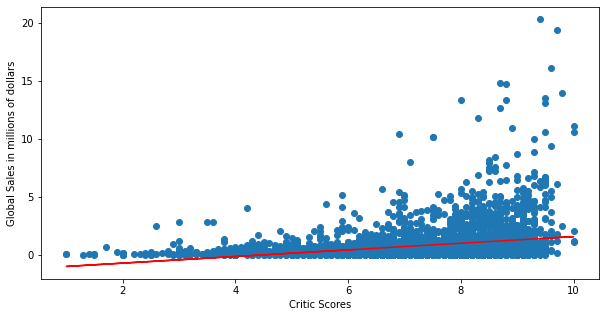

In [17]:
y = critic_vs_sales.Global_Sales
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.ylabel('Global Sales in millions of dollars')
plt.xlabel('Critic Scores')
plt.show()

In [18]:
# Examine the specific parameters of our model: the slope and the y-intercept.
# The slope is represented by model.coef_, and model.intercept_ is the y-intercept
print(model.coef_)
print(model.intercept_)

[0.28613215]
-1.2887780805754259


In [19]:
# The best fit line is in red, drawn through the predictions.
critic_vs_sales['Critic_Score'].max()

10.0